In [155]:
#import libraries
import datetime as dt
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import plotly.offline as pyo
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import setuptools as setup

import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

#yahoo bug fix
import yfinance as yf
yf.pdr_override()

pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend = 'plotly'

file_path = './code.txt'
with open(file_path,"r") as file:
    lines = file.readlines()


In [156]:
#set the time range
end = dt.datetime.now()
start =dt.datetime(2023,2,1)

#call the api

df = pdr.DataReader(lines[0],start, end)

print(df)




/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/yfinance/utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-02-01  405.209991  413.670013  402.350006  410.799988  404.649872   
2023-02-02  414.859985  418.309998  412.880005  416.779999  410.540314   
2023-02-03  411.589996  416.970001  411.089996  412.350006  406.176666   
2023-02-06  409.790009  411.290009  408.100006  409.829987  403.694366   
2023-02-07  408.869995  416.489990  407.570007  415.190002  408.974152   
...                ...         ...         ...         ...         ...   
2024-02-15  499.290009  502.200012  498.799988  502.010010  502.010010   
2024-02-16  501.700012  502.869995  498.750000  499.510010  499.510010   
2024-02-20  497.720001  498.410004  494.450012  496.760010  496.760010   
2024-02-21  495.420013  497.369995  493.559998  497.209991  497.209991   
2024-02-22  504.010010  508.489990  503.019989  507.500000  507.500000   

               Volume  
Date         

In [157]:
#pandas method testing
df.shape
df[['Volume']].max()
print(df['Open'].idxmax())
print(df.Open.max())

2024-02-22 00:00:00
504.010009765625


<function matplotlib.pyplot.show(close=None, block=None)>

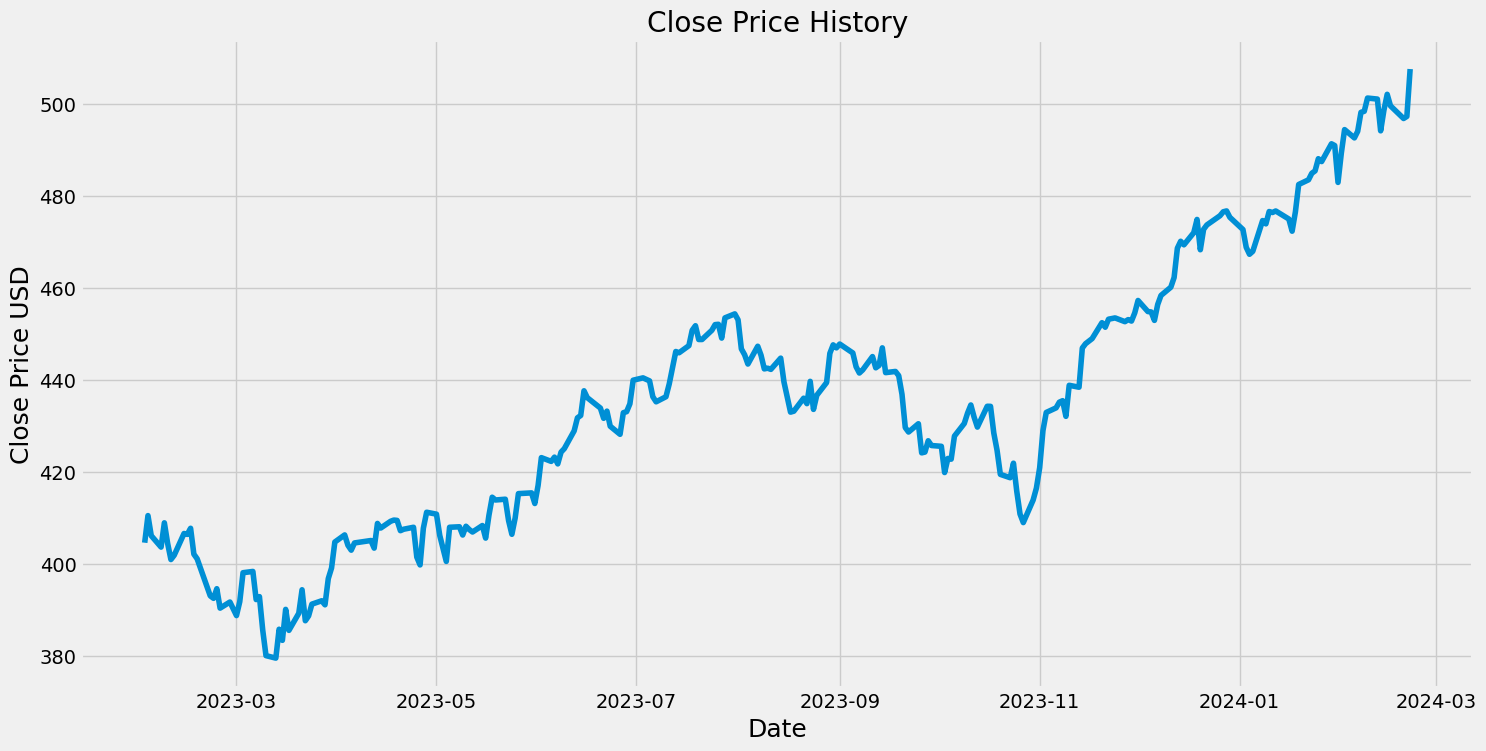

In [158]:
#Create a graph
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Adj Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.show

In [159]:
data = df.filter(['Adj Close'])

dataset = data.values